# CERVICAL CANCER RISK PREDICTION IN WOMEN
---

Every year, just in India alone, around 122,000 women are diagnosed with cervical cancer, out of which around 67,000 die succumb to the disease. One of the primary reasons why the disease is so deadly is because cervical cancer is hard to detect, and the patient is usually diagnosed only in the later stages of the cancer.

This aim of this project is to create a binary classifier that is able to tell whether a woman is at the risk of cervical cancer or not. So let's begin by first importing all the necessary project dependencies.

## Importing Project Dependencies
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us import the dataset.

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Now that we have imported the dataset, the next step is to wrangle (preprocess) the dataset.

## Data Wrangling

Let us begin by checking for null values within our dataset.

In [3]:
data.info() # prints the number of non-null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

As per MayoClinic.org the risk factors for cervical cancer includes: 
1. Many sexual partners
2. Early sexual activity
3. Other sexually transmitted infections (STIs)
4. A weakened immune system
5. Smoking
6. Exposure to miscarriage prevention drug
7. Practice unsafe sex

Various strains of the human papillomavirus (HPV), a sexually transmitted infection, play a role in causing most cervical cancer.

When exposed to HPV, the body's immune system typically prevents the virus from doing harm. In a small percentage of people, however, the virus survives for years, contributing to the process that causes some cervical cells to become cancer cells.

Therefore to tell whether a woman is at the risk of cervical cancer or not diagnosis of HPV plays the major role.
So we select only the important features of the data

In [4]:
data_sel = data[['Number of sexual partners', 'First sexual intercourse', 'Smokes', 'Smokes (years)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:HPV']]

As per resources like MayoClinic and WebMD, the STD HPV plays a key role in bringing about the DNA mutation that might end up turning the cervical tissues cancerous. Hence, we will drop all the rows for which the STDs:HPV value is a null value (NaN).   

In [5]:
# drop rows where STDs:HPV == NaN
data_cleaned = data_sel[data_sel['STDs:HPV'].notna()]

Now, let us drop the columns '__STDs: Time since first diagnosis__' and '__STDs: Time since last diagnosis__' since most values in these columns are null values.

In [6]:
# deleting unnecessary columns
data_cleaned.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number of sexual partners        739 non-null    float64
 1   First sexual intercourse         747 non-null    float64
 2   Smokes                           743 non-null    float64
 3   Smokes (years)                   743 non-null    float64
 4   Hormonal Contraceptives          740 non-null    float64
 5   Hormonal Contraceptives (years)  740 non-null    float64
 6   IUD                              737 non-null    float64
 7   IUD (years)                      737 non-null    float64
 8   STDs                             753 non-null    float64
 9   STDs (number)                    753 non-null    float64
 10  STDs:HPV                         753 non-null    float64
 11  STDs: Number of diagnosis        753 non-null    int64  
 12  Dx:HPV                

C:\Users\Aniket Agrawal\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


For the rest of the null values, we will simply replace them with the mode (highest frequent observation) of the respective columns.

In [7]:
# creating a dictionary that maps with what value each columns null values will be replaced
# Here, the filler is mode of the column
values = {
    'Number of sexual partners': data_cleaned['Number of sexual partners'].mode()[0],
    'First sexual intercourse': data_cleaned['First sexual intercourse'].mode()[0],
    'Smokes': data_cleaned['Smokes'].mode()[0],
    'Smokes (years)': data_cleaned['Smokes (years)'].mode()[0],
    'Hormonal Contraceptives': data_cleaned['Hormonal Contraceptives'].mode()[0],
    'Hormonal Contraceptives (years)': data_cleaned['Hormonal Contraceptives (years)'].mode()[0],
    'IUD': data_cleaned['IUD'].mode()[0],
    'IUD (years)': data_cleaned['IUD (years)'].mode()[0],
}

# replacing null values
data_cleaned.fillna(value=values, inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number of sexual partners        753 non-null    float64
 1   First sexual intercourse         753 non-null    float64
 2   Smokes                           753 non-null    float64
 3   Smokes (years)                   753 non-null    float64
 4   Hormonal Contraceptives          753 non-null    float64
 5   Hormonal Contraceptives (years)  753 non-null    float64
 6   IUD                              753 non-null    float64
 7   IUD (years)                      753 non-null    float64
 8   STDs                             753 non-null    float64
 9   STDs (number)                    753 non-null    float64
 10  STDs:HPV                         753 non-null    float64
 11  STDs: Number of diagnosis        753 non-null    int64  
 12  Dx:HPV                

C:\Users\Aniket Agrawal\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


With this, we have dealt with all the missing/null values within our dataset. Now, let us have a look at the statistical analysis of the data.

In [8]:
data_cleaned.describe() # printing statistical analysis

,Number of sexual partners,First sexual intercourse,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:HPV,STDs: Number of diagnosis,Dx:HPV
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,2.519256,17.073041,0.142098,1.210974,0.644090,2.173831,0.110226,0.506600,0.104914,0.176627,0.002656,0.099602,0.023904
std,1.670286,2.838513,0.349383,4.115163,0.479106,3.614502,0.313379,1.928602,0.306646,0.561993,0.051503,0.321089,0.152853
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,17.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,18.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,32.000000,1.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,3.000000,1.000000


Let us now normalize all the feature variables. Normalization is an important step. This is because it converts all the features to the same scale, ensuring that no single feature variable ends up a feature weight so large that it overshadows the effect of any other feature variable.  

In [9]:
# Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
xvalues = data_cleaned[['Number of sexual partners', 'First sexual intercourse', 'Smokes', 'Smokes (years)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:HPV', 'STDs: Number of diagnosis']]
X = xvalues.values.astype(float)

from sklearn import preprocessing
# creating Standard Scaler class object
scaler = preprocessing.StandardScaler()
# performing the scaling operation with fit_transform method
X = scaler.fit(X).transform(X.astype(float))
y = data_cleaned['Dx:HPV'].values
print(X)

[[ 0.88711038 -0.73081181 -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]
 [-0.91018321 -1.08334307 -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]
 [-0.91018321 -0.73081181 -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]
 ...
 [-0.31108534 -0.0257493  -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]
 [-0.31108534  2.44196951 -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]
 [-0.31108534  1.03184448 -0.4069824  ... -0.31449551 -0.05160539
  -0.31040536]]


Now, as the final step of our data preprocessing, let us split the data into training and test sets. 

In [10]:
# importing the train_test_split method
from sklearn.model_selection import train_test_split
# performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# printing the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(527, 12) (226, 12) (527,) (226,)


Now, before we move on to the modeling part, let us perform some EDA that will help us understand our data better.

## Exploratory Data Analysis
---

First, let us observe the First sexual intercourse distribution of the patients positively diagnosed with cervical cancer.

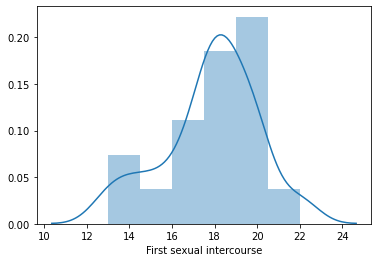

In [11]:
sns.distplot(data_cleaned['First sexual intercourse'][data_cleaned['Dx:HPV']==1])

The above plot shows that women between the First sexual intercourse of 16-21 are at the highest risk of cervical cancer. Post the age of 22, the risk is significantly lower.  

Now, let us observe how smoking affects the chances of cervical cancer. 

Text(0.5, 1.0, 'Smoking and Cervical Cancer')

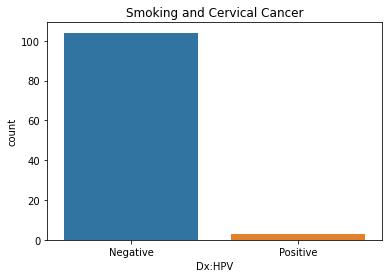

In [12]:
fig, ax = plt.subplots()
sns.countplot(data_cleaned['Dx:HPV'][data_cleaned['Smokes']==1], ax=ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_title('Smoking and Cervical Cancer')


As we can see from the above given plot, the observations don't reveal much that can be enough to derive any conclusion whether smoking can be a cause of cervical cancer. One reason for this can be the sampling bias within the data (more cases of negative diagnosis than positive ones.)

Let us now observe the relationship between hormonal contraceptives and cervical cancer. Hormonal contraceptives cause disruption in the natural ovulation cycle within women, and are known to have several side effects.

[Text(0, 0, '0.0'),
 Text(0, 0, '0.16'),
 Text(0, 0, '0.75'),
 Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0')]

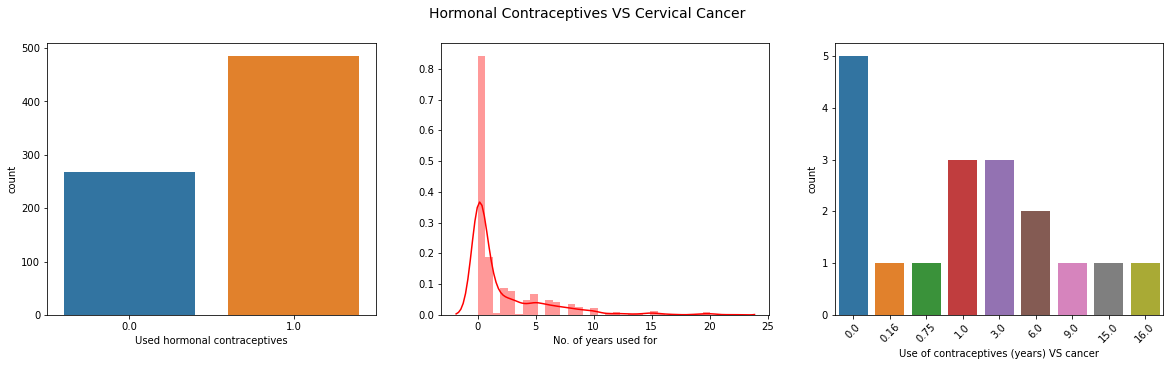

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Hormonal Contraceptives VS Cervical Cancer', fontsize=14)
# plot 1
sns.countplot(data_cleaned['Hormonal Contraceptives'], ax=ax[0])
ax[0].set_xlabel('Used hormonal contraceptives')
# plot 2
sns.distplot(data_cleaned['Hormonal Contraceptives (years)'], color='red', ax=ax[1])
ax[1].set_xlabel('No. of years used for')
# plot 3
sns.countplot(data_cleaned['Hormonal Contraceptives (years)'][data_cleaned['Dx:HPV']==1])
ax[2].set_xlabel('Use of contraceptives (years) VS cancer')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

Here are the observations from the above given plots:
* Most of the women in the study were using or had used hormonal contraceptives in the past.
* The above given trend is reflected in the other plots as well. If we ignore those positively diagnosed patients that had not taken the contraceptives, we will observe that the relationship between term-of-use of the contraceptives and the number of positive diagnosis fluctuates up until the one year point. After that, the trend is more stable. This, to some point can point that contraceptives in the long run might be the cause of cervical cancer. However, this hypothesis can be a result of the sampling bias within the data.


Now let us do this same analysis for IUDs as well.

C:\Users\Aniket Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


[Text(0, 0, '0.0'), Text(0, 0, '3.0'), Text(0, 0, '4.0'), Text(0, 0, '6.0')]

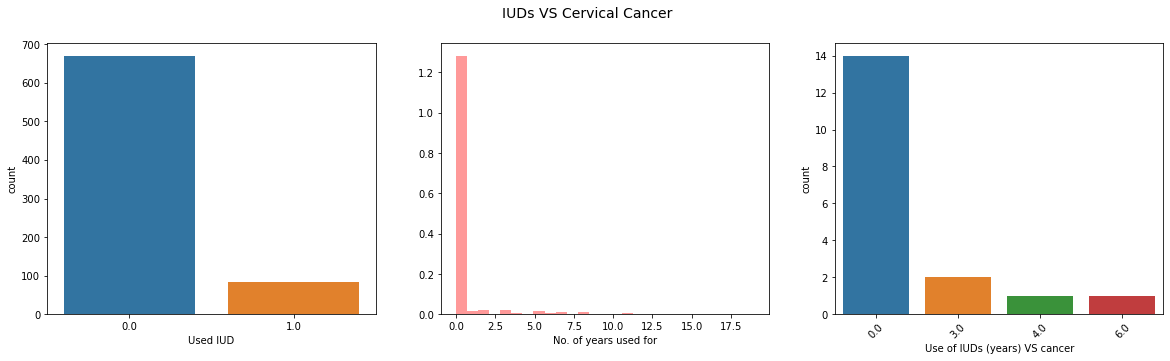

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('IUDs VS Cervical Cancer', fontsize=14)
# plot 1
sns.countplot(data_cleaned['IUD'], ax=ax[0])
ax[0].set_xlabel('Used IUD')
# plot 2
sns.distplot(data_cleaned['IUD (years)'], color='red', ax=ax[1])
ax[1].set_xlabel('No. of years used for')
# plot 3
sns.countplot(data_cleaned['IUD (years)'][data_cleaned['Dx:HPV']==1])
ax[2].set_xlabel('Use of IUDs (years) VS cancer')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

Observations from the above given plots:
* Most women in the survey didn't use IUDs. 
* From the above observations, IUDs don't seem to be having a considerable role in causing cervical cancer.  

With this, we come to the end of the EDA part. In the next section, we will be modeling a machine learning solution for classifying whether a female patient is at the risk of developing cervical cancer or not.

## Modeling & Evaluation
---

In this section, we will finally train our models and then compare their performances.

### 1. Decision Tree Classifier

In [15]:
# step-1: Importing the decision tree classifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

# step-2: Create an instance of the DecisionTreeClassifier called Tree.
Tree = DecisionTreeClassifier()

# step-3: fit the data with the training feature matrix X_train and training response vector y_train
Tree.fit(X_train,y_train)

# step-4: Make some predictions on the testing dataset and store it into a variable called predTree
predTree = Tree.predict(X_test)

Now, let us Evaluate

In [16]:
# import metrics from sklearn and check the accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9557522123893806


From the above Accuracy Score, we get to know that our Decision Tree model has a 95.57 accuracy

### 2. K Nearest Neighbors

In [17]:
# step1: Import library
from sklearn.neighbors import KNeighborsClassifier

# step2: calculate the accuracy of KNN for different Ks
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9778761061946902 with k= 2


In [18]:
# Accuracy evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9753320683111955
Test set Accuracy:  0.9778761061946902


From our KNN Classifier, we get a test set accuracy of 97.78% Accuracy

### 3. Logistic Regression

In [19]:
# step1: Build the model using LogisticRegression from Scikit-learn package
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)

# step2: Predict using the test set
yLR = LR.predict(X_test)

In [20]:
# Evaluation
# confusion matrix
from sklearn.metrics import confusion_matrix

cfm = pd.DataFrame(confusion_matrix(y_test, yLR))
cfm.columns= ['N', 'P']
cfm.index = ['N', 'P']
cfm

,N,P
N,221,0
P,5,0


#### From the above Confusion Matrix we get 0 false positive which is a good thing but also are getting 5 false positive which indicates that the performane of the LR is not good

In [21]:
#log loss for evaluation
y_prob = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(y_test, y_prob)

0.1139656273691435

### 4. SVM (Support Vector Machines)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


In [22]:
# step1: import library
from sklearn import svm

# step2: create a SVM instance and train from the trainset
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

#step2: Predict new values
ySVM = clf.predict(X_test)

In [23]:
# Evaluation
# Confusion matrix
from sklearn.metrics import confusion_matrix

cfm = pd.DataFrame(confusion_matrix(y_test, ySVM))
cfm.columns= ['N', 'P']
cfm.index = ['N', 'P']
cfm

,N,P
N,221,0
P,5,0


In [24]:
# f1_score
from sklearn.metrics import f1_score
f1_score(y_test, ySVM, average='weighted') 

0.9669378947160026